## Equação 1

$$\frac{\varepsilon(\rho_0)}{\rho_0} - M + B_0 = 0$$

## Equação 2

$$A(\rho) = \frac{a}{(1+b \rho)^n}$$

## Equação 3

$$B(\rho) = \frac{1}{\rho} - \frac{1}{\rho} \cdot \exp\left[ -\frac{\left( 4 - \frac{3 b \rho}{4}\right)\frac{3 b \rho}{4}}{\left( 1 - \frac{3 b \rho}{4}\right)^2}\right]$$

**O sistema é:**

$$\left\{\begin{aligned}
\varepsilon(\rho_0) / \rho_0 - M + B_0 &= 0 \\
P(\rho_0) &= 0 \\
K(\rho_0) - K_0 &= 0
\end{aligned}\right.$$

As variáveis são

$$\vec{x} = 
\begin{bmatrix}
a \\
b \\
n \\
\end{bmatrix}$$

Os parâmetros são $\rho_0$, $K_0$, $B_0$ e $M$

In [373]:
using Symbolics

@variables ρ a b n γ

ħ_c = 197.33 # MeV.fm
M = 938 #MeV
ρ₀= 0.16#(ħ_c)^3 #MeV^3  ##fm^-3
B₀ = 16 #MeV
K₀ = 250 #MeV
γ₀ = 4 #Adimensional

4

In [374]:
A = a / (1 + b * ρ)^n;

In [375]:
B = (1/ρ) - (1/ρ) * exp((((-1*b*ρ/4)*(4-((3*b*ρ)/4)))/(1-((b*ρ)/4))^2));

In [376]:
ρ_star = ρ /(1-B*ρ);

In [377]:
kf_star = ((6*π^2*ρ_star)/γ)^(1//3);

In [378]:
ε_star=(γ /(16*π^2))*( (2*kf_star^3 + kf_star*M^2)*hypot(kf_star, M) - M^4 * asinh(kf_star/M))
#ε_star = (γ /(16*π^2))*((hypot(kf_star, M)*2*kf_star^3) + M^4*log(M/(hypot(kf_star, M)+kf_star)))
#kf_star*hypot(kf_star, M) - (M^2)*atanh( kf_star/hypot(kf_star, M)));

In [379]:
ε = (1 - B*ρ) * ε_star - A * ρ^2;

In [380]:
P_star = (γ/(48*π^2))*( (2*kf_star^3 - 3*kf_star*M^2)*hypot(kf_star, M) + 3*M^4*asinh(kf_star/M))

#(γ/(48*π^2)) * (3*M^4*atanh( kf_star/hypot(kf_star, M)) +
         #   kf_star * hypot(kf_star, M) * (2*kf_star^2 - 3*M^2));

In [381]:
Dρ = Differential(ρ)
Σ = Dρ(B) * ρ * P_star - Dρ(A) * ρ^2;

In [382]:
P = P_star - (A * ρ^2) + (ρ * Σ); #ρ^2 * Dρ(ε/ρ) TODO: why is the symbolic differentiation not working?

In [383]:
K_id_star = 3 * kf_star^2 / hypot(kf_star, M);

In [384]:
K = 9 * Dρ(P);

In [385]:
# Outputs of F(X)

y1 = ε/ρ - M  ; ##+ B₀;
y2 = P;
y3 = K - K₀;
y4 = A;
y5 = B;
y6 = ε_star;

In [386]:
F_symb = [y1, y2, y3,y4,y5,y6];

In [387]:
#TODO
F_symb = expand_derivatives.(F_symb)
f_expr = build_function(F_symb, [a, b, n, ρ, γ])
F = eval(f_expr[1])

#39 (generic function with 1 method)

In [388]:
F([447.804015, 1.26421399, 3.009682, ρ₀, γ₀])

6-element Vector{Float64}:
  -41.15435706597043
   -3.2504490112848874
 -367.09343049377765
  257.218833656541
    1.2135731465212176
  186.24327992993213

In [389]:

F([447.804015, 1.26421399, 3.009682, ρ₀, γ₀])[1]

-41.15435706597043

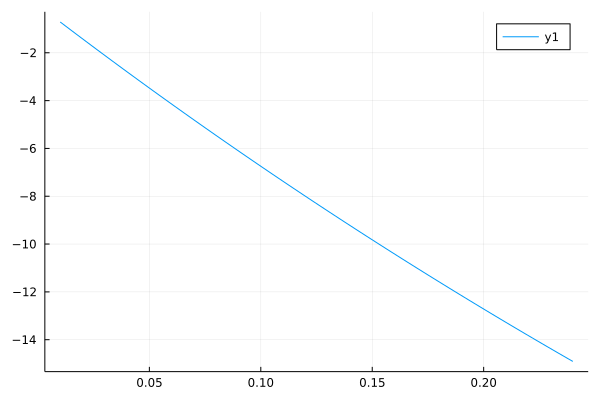

In [390]:

using Plots
f(x) = F([447.804015, 1.26421399, 3.009682, x*ρ₀, γ₀])[1]
g(x) =F([447.804015, 1.26421399, 3.009682, x*ρ₀, γ₀])[2]
xs = LinRange(0.01,0.24,100)
ys = f.(xs)
ys1 = g.(xs)
plot(xs,ys)


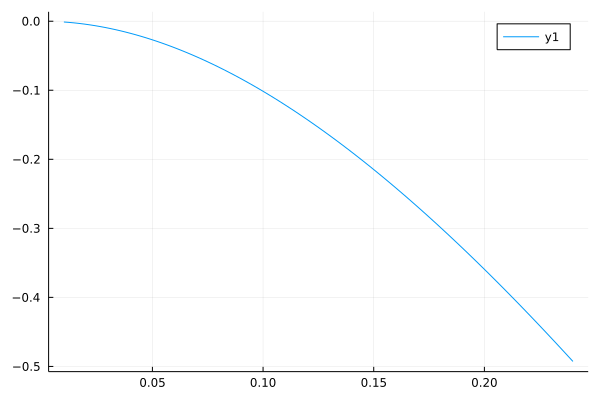

In [391]:
plot((xs,ys1))